In [1]:
from google.colab import files
uploaded = files.upload()

Saving mall.csv to mall.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [3]:
df = pd.read_csv("mall.csv")

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
X = df.iloc[:, [3, 4]].values

In [7]:
cluster = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    cluster.append(kmeans.inertia_)

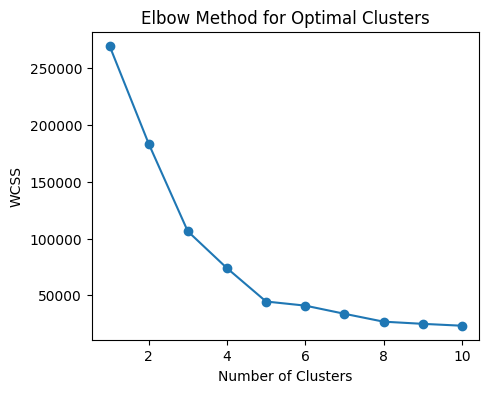

In [10]:
plt.figure(figsize=(5, 4))
plt.plot(range(1, 11), cluster, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [11]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)

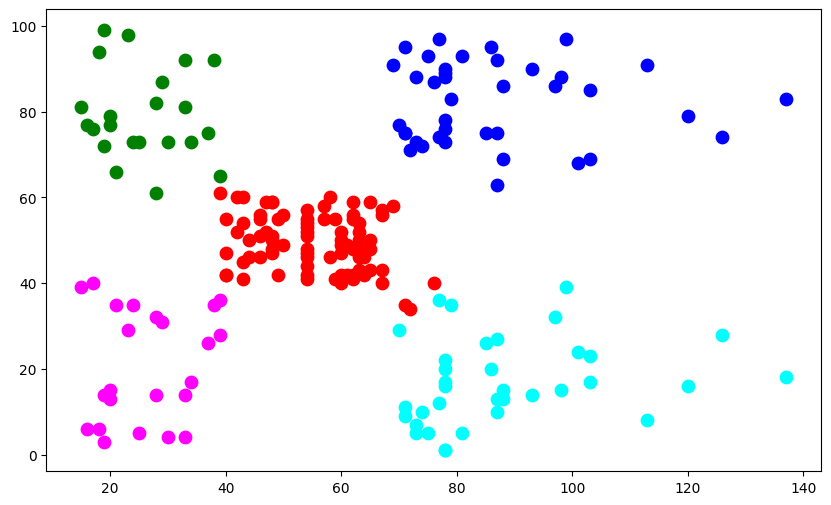

In [12]:
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1],
                s=80, c=colors[i], label=f"Cluster {i+1}")


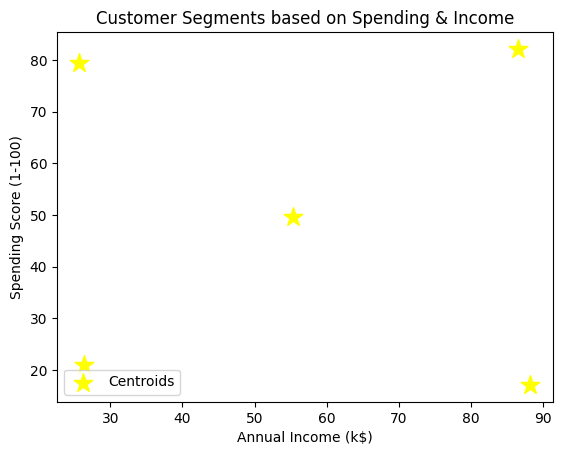

In [13]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c="yellow", marker="*", label="Centroids")

plt.title("Customer Segments based on Spending & Income")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()